Modelo Matematico - Prediccion del IPC

In [14]:
import yfinance
import pandas as pd
import numpy as np
import seaborn as sns

Primero procedemos a descargar los datos del IPC del 2018

In [2]:
ipc_data = yfinance.download(tickers='^MXX', start='2017-12-31', end='2018-12-31', interval='1wk')

[*********************100%***********************]  1 of 1 completed


In [3]:
ipc_data.reset_index(inplace=True)
ipc_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,49376.261719,50128.468750,49328.601562,49887.738281,49887.738281,573027400
1,2018-01-08,49916.570312,50233.621094,48408.750000,49135.910156,49135.910156,890275100
2,2018-01-15,49183.589844,49987.730469,49121.851562,49695.558594,49695.558594,640466000
3,2018-01-22,49711.511719,51107.511719,49709.199219,51065.488281,51065.488281,935837000
4,2018-01-29,51081.468750,51121.230469,49900.468750,50395.828125,50395.828125,788359800
5,2018-02-05,50388.000000,50513.308594,46985.808594,47799.089844,47799.089844,999634700
6,2018-02-12,47950.628906,49378.250000,47504.601562,48882.781250,48882.781250,743777000
7,2018-02-19,48886.968750,49198.140625,48431.968750,48643.429688,48643.429688,599158300
8,2018-02-26,48662.289062,48713.988281,47034.820312,47548.101562,47548.101562,889479000
9,2018-03-05,47628.808594,48809.320312,47217.980469,48556.449219,48556.449219,806813500


Hacemos el conteo de las semanas y "dropeamos" las columnas que no utilizaremos

In [4]:
n=ipc_data["Date"].count()
s=list(range (1,n))
week=pd.DataFrame(s)
ipc_data['Week']=week
ipc_data=ipc_data.drop(["Date","Open","High","Low","Close","Volume"], axis=1, inplace=False)
ipc_data.head

<bound method NDFrame.head of        Adj Close  Week
0   49887.738281   1.0
1   49135.910156   2.0
2   49695.558594   3.0
3   51065.488281   4.0
4   50395.828125   5.0
5   47799.089844   6.0
6   48882.781250   7.0
7   48643.429688   8.0
8   47548.101562   9.0
9   48556.449219  10.0
10  47477.578125  11.0
11  46515.929688  12.0
12  46124.851562  13.0
13  47926.109375  14.0
14  48768.300781  15.0
15  48431.578125  16.0
16  48284.609375  17.0
17  46992.171875  18.0
18  46728.921875  19.0
19  45666.769531  20.0
20  45091.988281  21.0
21  45013.121094  22.0
22  45939.539062  23.0
23  46938.820312  24.0
24  46737.640625  25.0
25  47663.199219  26.0
26  48981.410156  27.0
27  48406.011719  28.0
28  48908.238281  29.0
29  49643.941406  30.0
30  49302.570312  31.0
31  48383.589844  32.0
32  48264.628906  33.0
33  49633.769531  34.0
34  49547.679688  35.0
35  48971.140625  36.0
36  49611.929688  37.0
37  49344.289062  38.0
38  49504.160156  39.0
39  48052.851562  40.0
40  47444.050781  41.0
41  

In [5]:
close=[]
x2=[]
x3=[]
close=ipc_data["Adj Close"]
datosx=ipc_data["Week"]
for i in datosx:
    s= i*i
    f= s*i
    x2.append(s)
    x3.append(f)
ipc_data['x2']=x2
ipc_data['x3']=x3
ipc_data['close']=close
ipc_data=ipc_data.drop(["Adj Close"], axis=1, inplace=False)
ipc_data

,Week,x2,x3,close
0,1.0,1.0,1.0,49887.738281
1,2.0,4.0,8.0,49135.910156
2,3.0,9.0,27.0,49695.558594
3,4.0,16.0,64.0,51065.488281
4,5.0,25.0,125.0,50395.828125
5,6.0,36.0,216.0,47799.089844
6,7.0,49.0,343.0,48882.781250
7,8.0,64.0,512.0,48643.429688
8,9.0,81.0,729.0,47548.101562
9,10.0,100.0,1000.0,48556.449219


In [6]:
ipc_data.drop([52], inplace=True)
ipc_data

,Week,x2,x3,close
0,1.0,1.0,1.0,49887.738281
1,2.0,4.0,8.0,49135.910156
2,3.0,9.0,27.0,49695.558594
3,4.0,16.0,64.0,51065.488281
4,5.0,25.0,125.0,50395.828125
5,6.0,36.0,216.0,47799.089844
6,7.0,49.0,343.0,48882.781250
7,8.0,64.0,512.0,48643.429688
8,9.0,81.0,729.0,47548.101562
9,10.0,100.0,1000.0,48556.449219


In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

In [8]:
mod = sm.OLS.from_formula('close~Week+x2+x3', data=ipc_data).fit()
mod.params

Intercept    51974.284202
Week          -785.901023
x2              38.571816
x3              -0.542340
dtype: float64

Text(0.5, 1.0, 'Suavizado polinomial de orden 3')

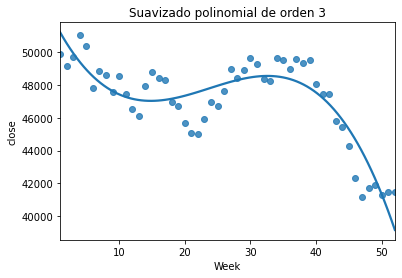

In [95]:
ax = sns.regplot(x='Week', y='close', data=ipc_data, order=3, ci=None)
plt.title('Suavizado polinomial de orden 3')

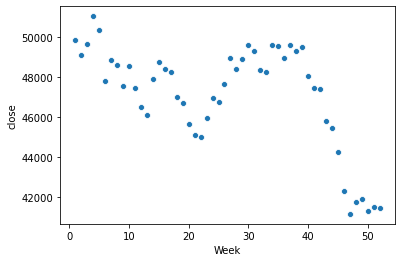

In [10]:
ipc_data.drop(["x2","x3"], axis=1, inplace=False)
import matplotlib.pyplot as plt
ax = sns.scatterplot(x='Week', y='close', data=ipc_data)

In [15]:
ipc_array = np.array((ipc_data['Week'], ipc_data['close']))
ipc_array

array([[1.00000000e+00, 2.00000000e+00, 3.00000000e+00, 4.00000000e+00,
        5.00000000e+00, 6.00000000e+00, 7.00000000e+00, 8.00000000e+00,
        9.00000000e+00, 1.00000000e+01, 1.10000000e+01, 1.20000000e+01,
        1.30000000e+01, 1.40000000e+01, 1.50000000e+01, 1.60000000e+01,
        1.70000000e+01, 1.80000000e+01, 1.90000000e+01, 2.00000000e+01,
        2.10000000e+01, 2.20000000e+01, 2.30000000e+01, 2.40000000e+01,
        2.50000000e+01, 2.60000000e+01, 2.70000000e+01, 2.80000000e+01,
        2.90000000e+01, 3.00000000e+01, 3.10000000e+01, 3.20000000e+01,
        3.30000000e+01, 3.40000000e+01, 3.50000000e+01, 3.60000000e+01,
        3.70000000e+01, 3.80000000e+01, 3.90000000e+01, 4.00000000e+01,
        4.10000000e+01, 4.20000000e+01, 4.30000000e+01, 4.40000000e+01,
        4.50000000e+01, 4.60000000e+01, 4.70000000e+01, 4.80000000e+01,
        4.90000000e+01, 5.00000000e+01, 5.10000000e+01, 5.20000000e+01],
       [4.98877383e+04, 4.91359102e+04, 4.96955586e+04, 5.10654

In [84]:
from scipy.interpolate import CubicSpline

cs = CubicSpline(ipc_array[0], ipc_array[1])
cs

In [90]:
x_new = np.arange(np.amin(ipc_array[0]), np.amax(ipc_array[0]), 0.1)
x_new

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,
        6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,
        7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,
        9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8,
       10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9,
       12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. ,
       13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1,
       14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2,
       15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16

Text(0.5, 1.0, 'Cubic-spline interpolation')

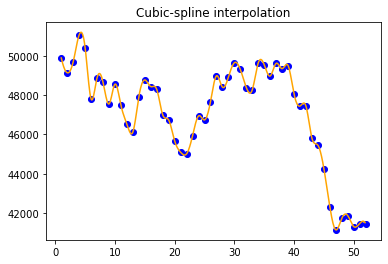

In [92]:
plt.figure()
plt.plot(ipc_array[0,:], ipc_array[1,:], 'ob')
plt.plot(x_new, cs(x_new), label="S", color='orange')
plt.title('Cubic-spline interpolation')

In [94]:
cs(x_new)

array([49887.73828125, 49758.51722121, 49640.83886434, 49534.87788425,
       49440.80895454, 49358.80674881, 49289.04594069, 49231.70120376,
       49186.94721164, 49154.95863794, 49135.91015625, 49129.97644019,
       49137.33216336, 49158.15199936, 49192.61062181, 49240.88270431,
       49303.14292046, 49379.56594388, 49470.32644816, 49575.59910692,
       49695.55859375, 49829.70371335, 49974.82979473, 50127.05629799,
       50282.50268322, 50437.28841051, 50587.53293996, 50729.35573166,
       50858.87624572, 50972.21394221, 51065.48828125, 51135.17352281,
       51179.16312646, 51195.70535165, 51183.04845783, 51139.44070444,
       51063.13035096, 50952.36565682, 50805.39488148, 50620.46628439,
       50395.828125  , 50131.94771493, 49838.16857442, 49526.05327589,
       49207.16439173, 48893.06449437, 48595.31615621, 48325.48194966,
       48095.12444713, 47915.80622102, 47799.08984375, 47752.80187529,
       47769.82482586, 47839.30519325, 47950.38947524, 48092.22416963,
      